# Predictive Modelling of Distillation Column using Machine Learning

In Process engineering, machine learning can be used to identify anomalies, optimize processes, and make accurate predictions on products.

### Why is this project important?
- Importance of maintaining on-specification production

- As LLMs bridge the gap between natural language and programming languages, the barrier of entry for programming and machine learning is shrinking. Thus, teaching a chemical engineer or chemist how to implement machine learning algorithms will be easier than teaching a data scientist or machine learning engineer the principles of chemical engineering and chemistry. 

### Goals of Project

1. Use machine learning algorithms to predict the product from a distillation column
2. Use chemical engineering domain knowledge to create a more accurate model

### Dataset
- Process measurements from a distillation column at different operating conditions
- Experimental measurement of product's vapor pressure

In [5]:
import pandas as pd

data = pd.read_csv('distillation-tower.csv')

In [6]:
print(data.shape)
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.')

(253, 28)
The data has 253 rows and 28 columns.


In [7]:
data.head()

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,Temp10,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure
0,2000-08-21,139.9857,432.0636,377.8119,100.2204,492.1353,490.1459,180.5578,187.4331,215.0627,...,513.9653,8.6279,10.5988,30.8983,489.9900,2.0409,2.6468,2.1681,4.3524,32.5026
1,2000-08-23,131.0470,487.4029,371.3060,100.2297,482.2100,480.3128,172.6575,179.5089,205.0999,...,504.5145,8.7662,10.7560,31.9099,480.2888,2.0821,2.6932,2.2207,4.5497,34.8598
2,2000-08-26,118.2666,437.3516,378.4483,100.3084,488.7266,487.0040,165.9400,172.9262,205.0304,...,508.9997,8.5319,10.5737,29.9165,486.6190,2.0550,2.6424,2.1796,4.5511,32.1666
3,2000-08-29,118.1769,481.8314,378.0028,95.5766,493.1481,491.1137,167.2085,174.2338,205.2561,...,514.1794,8.6260,10.6695,30.6229,491.1304,2.0361,2.6455,2.1620,4.5464,30.4064
4,2000-08-30,120.7891,412.6471,377.8871,92.9052,490.2486,488.6641,167.0326,173.9681,205.0883,...,511.0948,8.5939,10.4922,29.4977,487.6475,2.0507,2.6463,2.1704,4.5499,30.9238


### Data visualization
- Identify any trends in the dataset
- Find features that correlate with vapor pressure

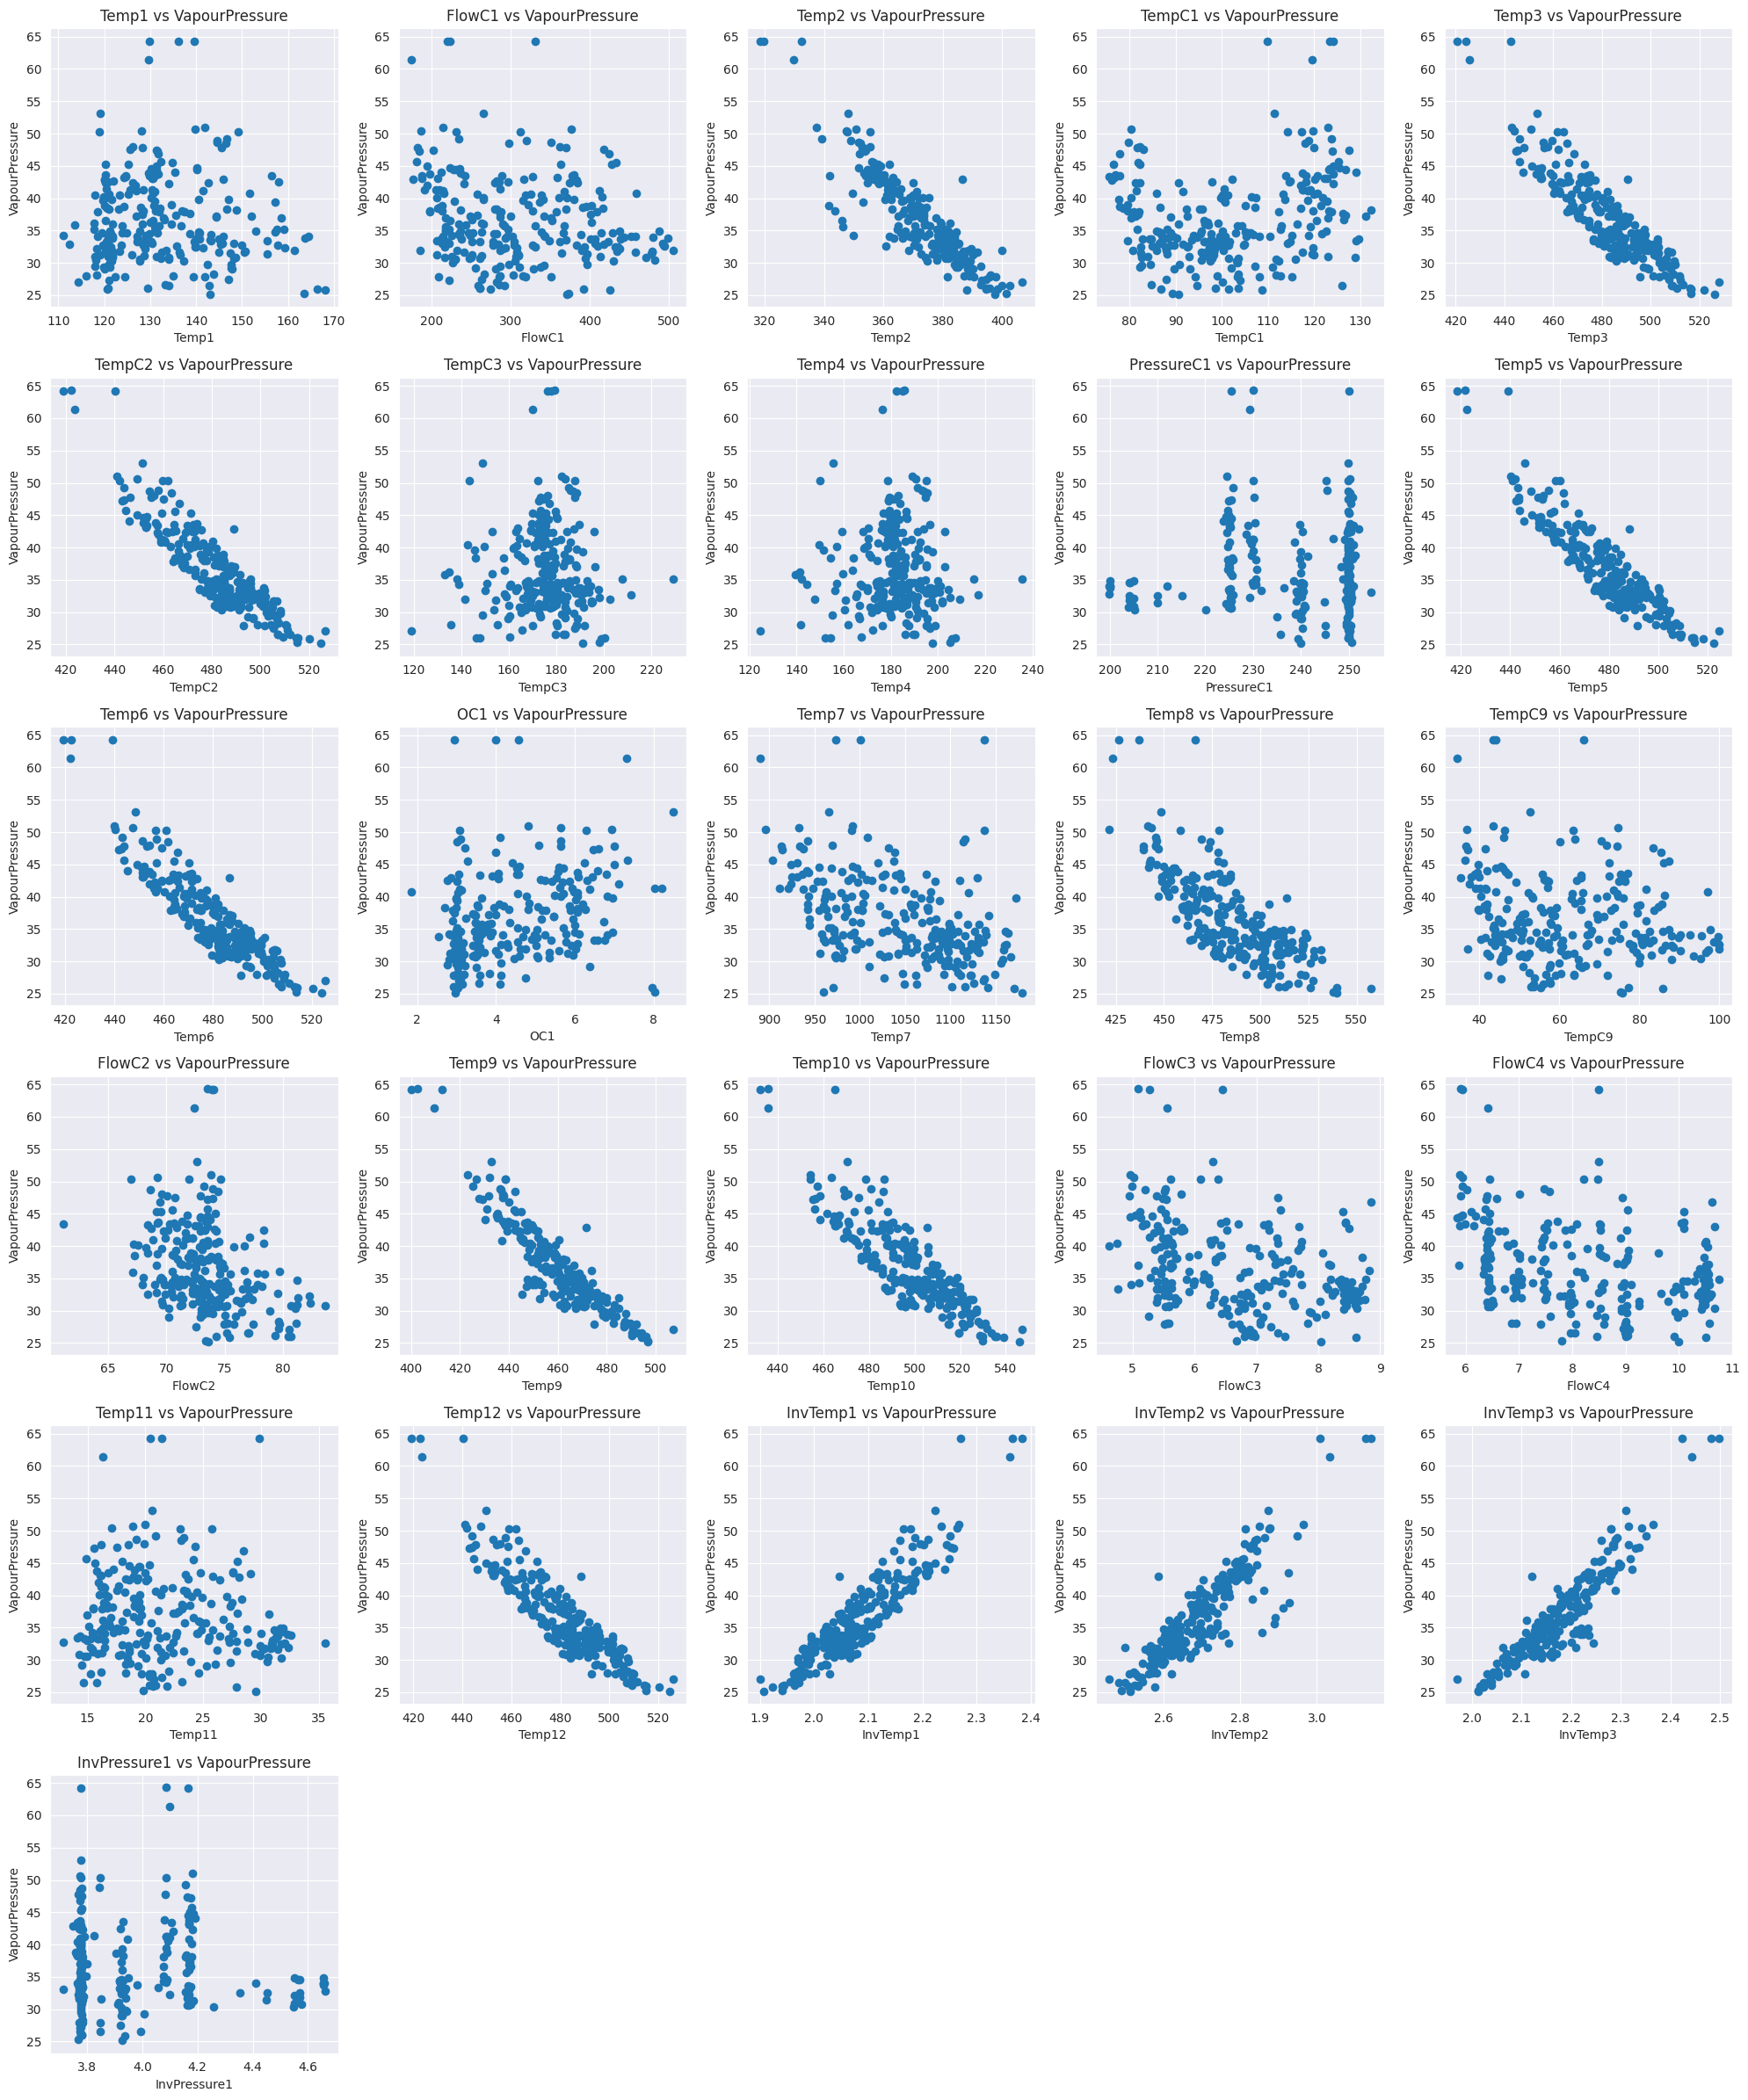

In [8]:
import matplotlib.pyplot as plt 

cols = ['Temp1', 'FlowC1', 'Temp2', 'TempC1', 'Temp3', 'TempC2', 'TempC3', 'Temp4', 'PressureC1', 'Temp5', 'Temp6', 'OC1', 'Temp7', 'Temp8', 'TempC9', 'FlowC2', 'Temp9', 'Temp10', 'FlowC3', 'FlowC4', 'Temp11', 'Temp12', 'InvTemp1', 'InvTemp2', 'InvTemp3', "InvPressure1"]
fig, axes = plt.subplots(6, 5, figsize=(20, 24))
axes_flat = axes.flatten()
for i, col in enumerate(cols):
    axes_flat[i].scatter(data[col], data['VapourPressure'])
    axes_flat[i].set_title(f'{col} vs VapourPressure')
    axes_flat[i].set_xlabel(col)
    axes_flat[i].set_ylabel('VapourPressure')
for j in range(i+1, 30):
    axes_flat[j].set_visible(False)
fig.tight_layout()
plt.show()

There is a clear relationship between the temperature measurements and vapor pressure. From thermodynamics, we know that the Antoine Equation relates vapor pressure to the inverse temperature.
$$
ln(P^{*}) = A-\frac{B}{T+C}
$$

It is also apparent that the InvTemp3 data has the most linear relationship with the Vapor pressure.

### Dimensionality Reduction
1. First, we will need to classify the Vapor Pressure as on-specification or off-specification. 
2. Because this is an anonymous dataset, we will assume that any VapourPressure under 40 is on-specification.
3. Use linear and non-linear dimensionality reduction

In [9]:
data['Condition'] = (data['VapourPressure'] < 40).astype(int)

data.head()

,Date,Temp1,FlowC1,Temp2,TempC1,Temp3,TempC2,TempC3,Temp4,PressureC1,...,FlowC3,FlowC4,Temp11,Temp12,InvTemp1,InvTemp2,InvTemp3,InvPressure1,VapourPressure,Condition
0,2000-08-21,139.9857,432.0636,377.8119,100.2204,492.1353,490.1459,180.5578,187.4331,215.0627,...,8.6279,10.5988,30.8983,489.9900,2.0409,2.6468,2.1681,4.3524,32.5026,1
1,2000-08-23,131.0470,487.4029,371.3060,100.2297,482.2100,480.3128,172.6575,179.5089,205.0999,...,8.7662,10.7560,31.9099,480.2888,2.0821,2.6932,2.2207,4.5497,34.8598,1
2,2000-08-26,118.2666,437.3516,378.4483,100.3084,488.7266,487.0040,165.9400,172.9262,205.0304,...,8.5319,10.5737,29.9165,486.6190,2.0550,2.6424,2.1796,4.5511,32.1666,1
3,2000-08-29,118.1769,481.8314,378.0028,95.5766,493.1481,491.1137,167.2085,174.2338,205.2561,...,8.6260,10.6695,30.6229,491.1304,2.0361,2.6455,2.1620,4.5464,30.4064,1
4,2000-08-30,120.7891,412.6471,377.8871,92.9052,490.2486,488.6641,167.0326,173.9681,205.0883,...,8.5939,10.4922,29.4977,487.6475,2.0507,2.6463,2.1704,4.5499,30.9238,1


In [10]:
X = data.iloc[:, 2:-2].values
Y = data.iloc[:, -1].values

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

### Linear Dimensionality Reduction (PCA)

[Text(0.5, 1.0, 'Distillate Vapour Pressure')]

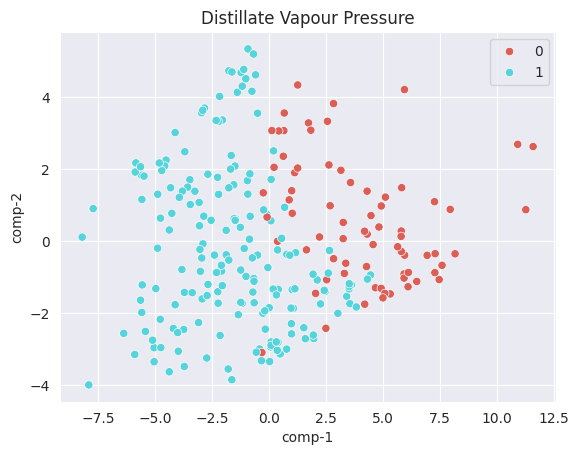

In [12]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=3) 
z = pca.fit_transform(X)

df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df["comp-3"] = z[:,2]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Distillate Vapour Pressure")

### Non-linear Dimensionality Reduction (TSNE)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 253 samples in 0.000s...
[t-SNE] Computed neighbors for 253 samples in 0.027s...
[t-SNE] Computed conditional probabilities for sample 253 / 253
[t-SNE] Mean sigma: 2.015046
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.473579
[t-SNE] KL divergence after 1550 iterations: 0.400364


[Text(0.5, 1.0, 'Distillate Vapour Pressure')]

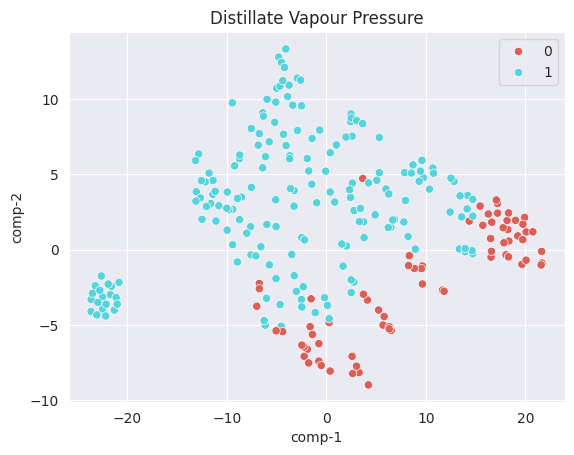

In [13]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=1, random_state=123, n_iter=2000, learning_rate='auto', perplexity=30)
z = tsne.fit_transform(X)
df = pd.DataFrame()
df["y"] = Y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="Distillate Vapour Pressure")

### Test TSNE Model

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=10), LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.882


### Vapor Pressure Prediction

We have a relatively small dataset, so we will first use ridge regression techniques to prevent overfitting.
Then, we will train a neural network to see which technique is more accurate.

In [16]:
data = pd.read_csv('distillation-tower.csv')

X = data.drop('VapourPressure', axis=1)
X = X.drop('Date', axis=1)
y = data['VapourPressure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Ridge Regression
- Our dataset is relatively small, so we will use ridge regression to start 
- With ridge regression, we can help prevent overfitting that will emerge from using a neural network

In [17]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

ridge_model = Ridge(alpha=10)
ridge_model.fit(X_train_scaled, y_train)
y_pred_r = ridge_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_r)
mae_r = mean_absolute_error(y_test, y_pred_r)
print("Mean Squared Error:", mse)
print(mae_r)

Mean Squared Error: 1.5758341153693596
0.914861640989787


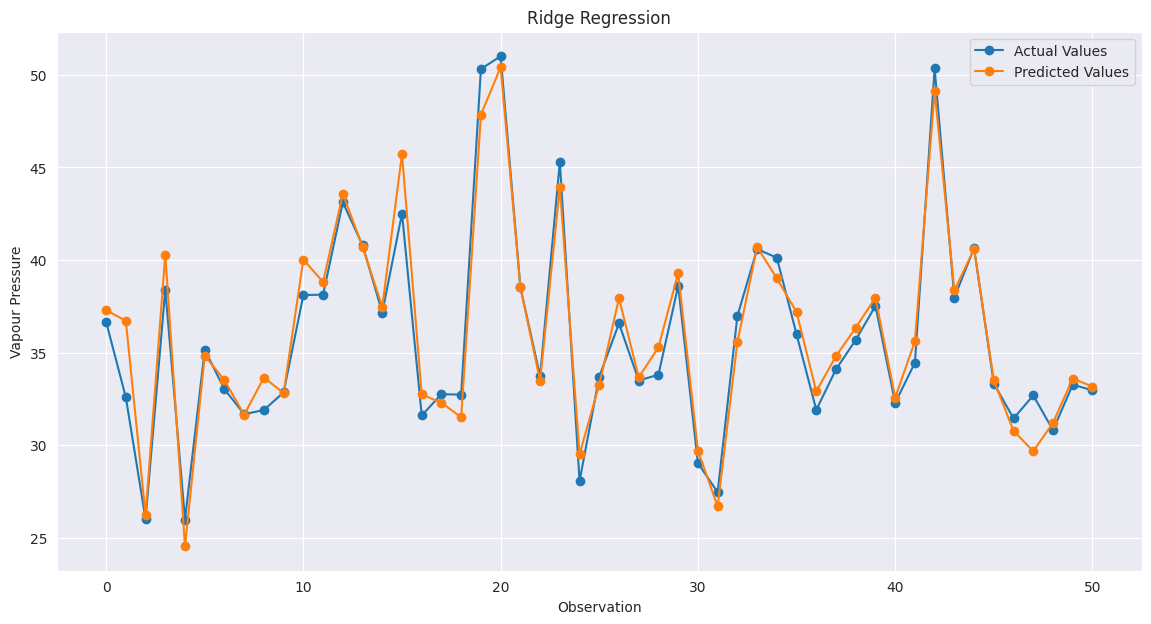

In [27]:
import numpy as np
indices = np.arange(len(y_test))

plt.figure(figsize=(14, 7))
plt.plot(indices, y_test, label='Actual Values', marker='o')
plt.plot(indices, y_pred_r, label='Predicted Values', marker='o')
plt.title('Ridge Regression')
plt.xlabel('Observation')
plt.ylabel('Vapour Pressure')
plt.legend()
plt.grid(True)
plt.show()

### Kernel Ridge Regression
- Useful for learning non-linear relationships in data

In [25]:
from sklearn.kernel_ridge import KernelRidge

krr_model = KernelRidge(alpha=0.1, kernel='polynomial', gamma=0.01)
krr_model.fit(X_train_scaled, y_train)
y_pred_kr = krr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred_kr)
mae_kr = mean_absolute_error(y_test, y_pred_kr)
print("Mean Squared Error:", mse)
print(mae_kr)

Mean Squared Error: 1.949835663435207
0.9117275890902111


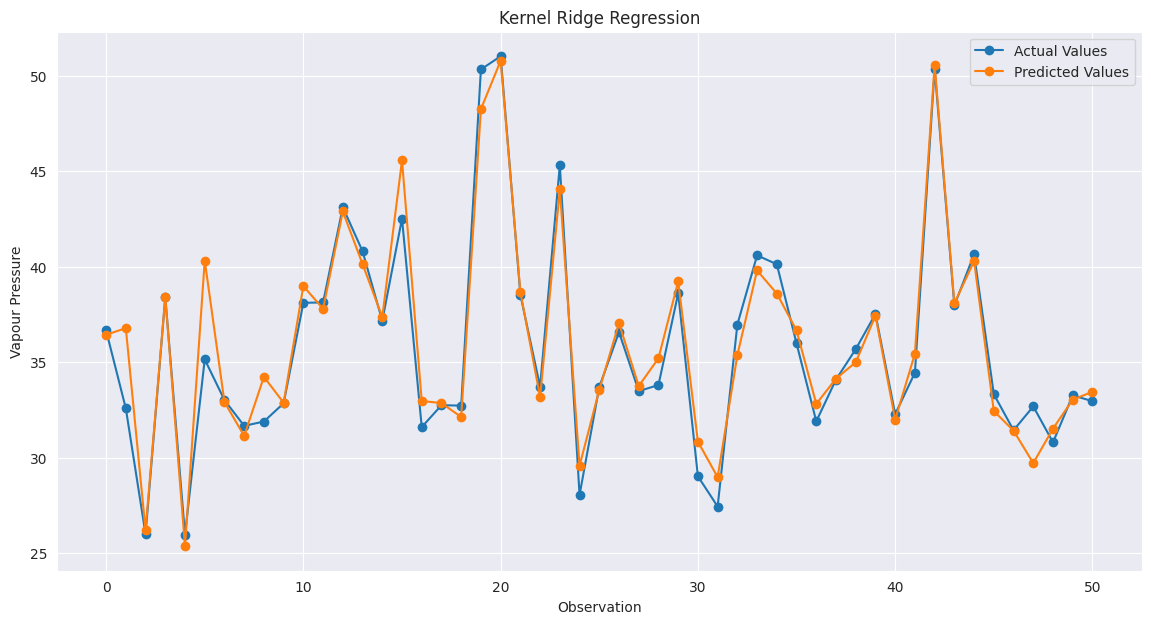

In [28]:
import numpy as np
indices = np.arange(len(y_test))

plt.figure(figsize=(14, 7))
plt.plot(indices, y_test, label='Actual Values', marker='o')
plt.plot(indices, y_pred_kr, label='Predicted Values', marker='o')
plt.title('Kernel Ridge Regression')
plt.xlabel('Observation')
plt.ylabel('Vapour Pressure')
plt.legend()
plt.grid(True)
plt.show()

### Now let's train a neural network

In [21]:
import pandas as pd
import torch
import numpy as np

data = pd.read_csv('distillation-tower.csv')

X = data.drop('VapourPressure', axis=1)
X = X.iloc[:, 1:]
y = data['VapourPressure']

In [22]:
from sklearn.model_selection import train_test_split

X_train_control, X_test_control, y_train_control, y_test_control = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X.shape

(253, 26)

### Neural Network #1

In [24]:
from torch.utils.data import TensorDataset, DataLoader

X_train_control_tensor = torch.tensor(X_train_control.values, dtype=torch.float32)
y_train_control_tensor = torch.tensor(y_train_control.values, dtype=torch.float32)
X_test_control_tensor = torch.tensor(X_test_control.values, dtype=torch.float32)
y_test_control_tensor = torch.tensor(y_test_control.values, dtype=torch.float32)

train_control_dataset = TensorDataset(X_train_control_tensor, y_train_control_tensor)
test_control_dataset = TensorDataset(X_test_control_tensor, y_test_control_tensor)

train_control_dataloader = DataLoader(train_control_dataset, batch_size=32, shuffle=True)
test_control_dataloader = DataLoader(test_control_dataset, batch_size=32, shuffle=False)

In [25]:
import torch.nn as nn

class VaporPressureNet(nn.Module):
    def __init__(self):
        super(VaporPressureNet, self).__init__()
        self.fc1 = nn.Linear(26, 64) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1) 

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [26]:
nn1 = VaporPressureNet()

criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(nn1.parameters(), lr=0.001)

epochs = 500

for epoch in range(epochs):
    nn1.train() 
    running_loss = 0.0
    for inputs, targets in train_control_dataloader:
        optimizer.zero_grad()
        outputs = nn1(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_control_dataloader.dataset)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

nn1.eval() 
with torch.no_grad(): 
    predictions1 = []
    targets1 = []
    for inputs, true_values in test_control_dataloader:
        outputs1 = nn1(inputs)
        predictions1.extend(outputs1.squeeze().tolist())
        targets1.extend(true_values.tolist())

from sklearn.metrics import r2_score, mean_absolute_error

r2_nn1 = r2_score(targets1, predictions1)
mae_nn1 = mean_absolute_error(targets1, predictions1)
print(f'R^2 Score on test set: {r2_nn1:.4f}')
print(f'Mean absolute error on test set: {mae_nn1: .4f}')

Epoch 1/500, Loss: 423.5240
Epoch 2/500, Loss: 126.6384
Epoch 3/500, Loss: 89.1569
Epoch 4/500, Loss: 100.3900
Epoch 5/500, Loss: 76.7659
Epoch 6/500, Loss: 75.9299
Epoch 7/500, Loss: 66.2317
Epoch 8/500, Loss: 66.9643
Epoch 9/500, Loss: 72.2634
Epoch 10/500, Loss: 73.3852
Epoch 11/500, Loss: 66.1306
Epoch 12/500, Loss: 66.0197
Epoch 13/500, Loss: 66.7816
Epoch 14/500, Loss: 66.1065
Epoch 15/500, Loss: 64.8165
Epoch 16/500, Loss: 63.9771
Epoch 17/500, Loss: 63.5111
Epoch 18/500, Loss: 65.4239
Epoch 19/500, Loss: 73.2406
Epoch 20/500, Loss: 72.2225
Epoch 21/500, Loss: 63.6677
Epoch 22/500, Loss: 67.7436
Epoch 23/500, Loss: 68.8903
Epoch 24/500, Loss: 62.0655
Epoch 25/500, Loss: 62.7785
Epoch 26/500, Loss: 59.6158
Epoch 27/500, Loss: 60.7674
Epoch 28/500, Loss: 61.6321
Epoch 29/500, Loss: 59.5033
Epoch 30/500, Loss: 61.8842
Epoch 31/500, Loss: 57.1372
Epoch 32/500, Loss: 60.3945
Epoch 33/500, Loss: 60.4530
Epoch 34/500, Loss: 58.1491
Epoch 35/500, Loss: 54.9080
Epoch 36/500, Loss: 57.621

### Not very accurate!

Can we apply domain specific knowledge to improve performance of model.

### Hybrid Model

Our dataset is small, but can we create a hybrid model so that our neural network needs less data.
From our data visualization, we found that InvTemp3 and Vapor Pressure had a strong correlation.

What equation relates vapor pressure and inverse temperature?

### Antoine Equation
$$
ln(P^{*}) = A-\frac{B}{T+C}
$$

Now, we can develop a linear regression model on ln(P) vs 1/T.

In [30]:
invt = data['InvTemp3']
vp = data['VapourPressure']

In [31]:
import numpy as np

vp = np.log(vp)

In [32]:
from sklearn.linear_model import LinearRegression

invt = np.array(invt).reshape(-1, 1)
vp = np.array(vp)

model = LinearRegression()

model.fit(invt, vp)

vp_pred = np.exp(model.predict(invt))
X['Antoine'] = vp_pred

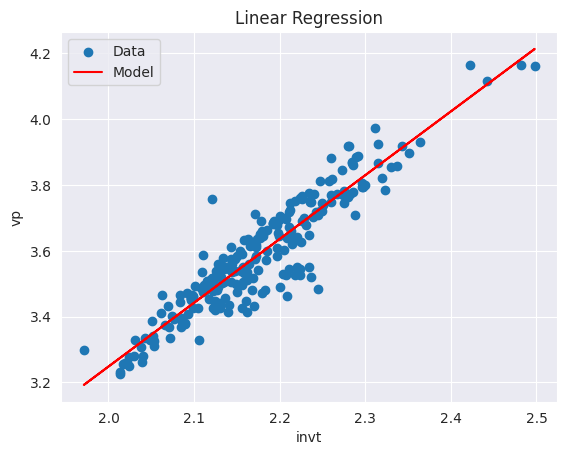

R-squared: 0.8649881279307753


In [34]:
import matplotlib.pyplot as plt

plt.scatter(invt, vp, label='Data')

plt.plot(invt, np.log(vp_pred), color='red', label='Model')

plt.xlabel('invt')
plt.ylabel('vp')
plt.title('Linear Regression')
plt.legend()

plt.show()

r_squared = model.score(invt, vp)
print(f'R-squared: {r_squared}')

### Neural Network #2 (Hybrid Model)

1. Copy train and test data from first neural network
2. Add predictions from linear regression model to our dataset

In [27]:
X_train, X_test, y_train, y_test = X_train_control.copy(), X_test_control.copy(), y_train_control.copy(), y_test_control.copy()


# Train data for third neural network
train_ln = np.log(y_train)
train_vp = np.array(train_ln)
invt_train = np.array(X_train['InvTemp3']).reshape(-1, 1)
model = LinearRegression()
model.fit(invt_train, train_vp)
vp_delta = np.exp(model.predict(invt_train))
y_train_delta = y_train - vp_delta

# Train data for second neural network
X_train['Antoine'] = vp_delta

# Test data for third neural network
test_vp = np.array(np.log(y_test))
invt_test = np.array(X_test['InvTemp3']).reshape(-1, 1)
model.fit(invt_test, test_vp)
test_prediction = np.exp(model.predict(invt_test))
y_test_delta = y_test - test_prediction

# Test data for second neural network
X_test['Antoine'] = test_prediction

Creates tensor dataset and data loader

In [29]:
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

y_train_delta_tensor = torch.tensor(y_train_delta.values, dtype=torch.float32)
y_test_delta_tensor = torch.tensor(y_test_delta.values, dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_delta_dataset = TensorDataset(X_train_control_tensor, y_train_delta_tensor)
test_delta_dataset = TensorDataset(X_test_control_tensor, y_test_delta_tensor)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
train_delta_dataloader = DataLoader(train_delta_dataset, batch_size=32, shuffle=True)
test_delta_dataloader = DataLoader(test_delta_dataset, batch_size=32, shuffle=False)

In [30]:
import torch.nn as nn

class VaporPressureNet1(nn.Module):
    def __init__(self):
        super(VaporPressureNet1, self).__init__()
        self.fc1 = nn.Linear(27, 64) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1) 

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [31]:
nn2 = VaporPressureNet1()

criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(nn2.parameters(), lr=0.001)

epochs = 500

for epoch in range(epochs):
    nn2.train() 
    running_loss = 0.0
    for inputs, targets in train_dataloader:
        optimizer.zero_grad()
        outputs = nn2(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_dataloader.dataset)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

nn2.eval() 
with torch.no_grad(): 
    predictions = []
    targets = []
    for inputs, true_values in test_dataloader:
        outputs = nn2(inputs)
        predictions.extend(outputs.squeeze().tolist())
        targets.extend(true_values.tolist())

from sklearn.metrics import r2_score, mean_absolute_error

r2_nn2 = r2_score(targets, predictions)
mae_nn2 = mean_absolute_error(targets, predictions)
print(f'R^2 Score on test set: {r2_nn2:.4f}')
print(f'Mean absolute error on test set: {mae_nn2: .4f}')

Epoch 1/500, Loss: 2534.2121
Epoch 2/500, Loss: 707.5047
Epoch 3/500, Loss: 209.4420
Epoch 4/500, Loss: 179.5242
Epoch 5/500, Loss: 107.4867
Epoch 6/500, Loss: 84.5434
Epoch 7/500, Loss: 77.3772
Epoch 8/500, Loss: 68.2218
Epoch 9/500, Loss: 66.9264
Epoch 10/500, Loss: 65.2160
Epoch 11/500, Loss: 64.0985
Epoch 12/500, Loss: 63.7428
Epoch 13/500, Loss: 63.7939
Epoch 14/500, Loss: 63.6478
Epoch 15/500, Loss: 63.5225
Epoch 16/500, Loss: 63.2088
Epoch 17/500, Loss: 63.1479
Epoch 18/500, Loss: 62.3567
Epoch 19/500, Loss: 62.4176
Epoch 20/500, Loss: 61.8547
Epoch 21/500, Loss: 61.5611
Epoch 22/500, Loss: 61.5753
Epoch 23/500, Loss: 62.6444
Epoch 24/500, Loss: 61.2859
Epoch 25/500, Loss: 60.6730
Epoch 26/500, Loss: 60.5212
Epoch 27/500, Loss: 60.1974
Epoch 28/500, Loss: 59.9531
Epoch 29/500, Loss: 59.6380
Epoch 30/500, Loss: 60.3358
Epoch 31/500, Loss: 58.6068
Epoch 32/500, Loss: 59.8123
Epoch 33/500, Loss: 57.9139
Epoch 34/500, Loss: 59.0500
Epoch 35/500, Loss: 62.2298
Epoch 36/500, Loss: 62.

In [32]:
def evaluate_nn2(n):
    single_observation = X_test.iloc[n]
    single_observation = single_observation.apply(pd.to_numeric, errors='coerce').fillna(0)
    single_observation_tensor = torch.tensor(single_observation.values, dtype=torch.float32).unsqueeze(0)
    nn2.eval()
    with torch.no_grad():
        prediction = nn2(single_observation_tensor)
    print("Predicted Vapour Pressure:", prediction.item())
    print("Experimental Vapour pressure:", y_test.iloc[n])

In [33]:
evaluate_nn2(20)

Predicted Vapour Pressure: 50.789878845214844
Experimental Vapour pressure: 51.011


### Better but worse than ridge regression

Let's try training a neural network on our original dataset to predict the difference between the experimental vapor pressure and our antoine regression model prediction.
Can we further guide our neural network by predicting how far off our antoine regression model is from the true value?

### Neural Network #3

In [34]:
nn3 = VaporPressureNet()

criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(nn3.parameters(), lr=0.001)

epochs = 500

for epoch in range(epochs):
    nn3.train() 
    running_loss = 0.0
    for inputs, targets in train_delta_dataloader:
        optimizer.zero_grad()
        outputs = nn3(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
    epoch_loss = running_loss / len(train_delta_dataloader.dataset)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

nn3.eval() 
with torch.no_grad(): 
    predictions2 = []
    targets2 = []
    for inputs, true_values in test_delta_dataloader:
        outputs2 = nn3(inputs)
        predictions2.extend(outputs2.squeeze().tolist())
        targets2.extend(true_values.tolist())

from sklearn.metrics import r2_score, mean_absolute_error

r2_nn3 = r2_score(targets2, predictions2)
mae_nn3 = mean_absolute_error(targets2, predictions2)
print(f'R^2 Score on test set: {r2_nn3:.4f}')
print(f'Mean absolute error on test set: {mae_nn3:.4f}')

Epoch 1/500, Loss: 76.4181
Epoch 2/500, Loss: 22.5374
Epoch 3/500, Loss: 17.5667
Epoch 4/500, Loss: 9.2042
Epoch 5/500, Loss: 8.7085
Epoch 6/500, Loss: 6.9529
Epoch 7/500, Loss: 6.7356
Epoch 8/500, Loss: 5.1290
Epoch 9/500, Loss: 4.6889
Epoch 10/500, Loss: 4.8085
Epoch 11/500, Loss: 4.6279
Epoch 12/500, Loss: 4.3556
Epoch 13/500, Loss: 4.3155
Epoch 14/500, Loss: 4.2429
Epoch 15/500, Loss: 5.8246
Epoch 16/500, Loss: 5.3571
Epoch 17/500, Loss: 4.5164
Epoch 18/500, Loss: 4.2383
Epoch 19/500, Loss: 4.3675
Epoch 20/500, Loss: 3.7471
Epoch 21/500, Loss: 5.4981
Epoch 22/500, Loss: 5.3189
Epoch 23/500, Loss: 4.8614
Epoch 24/500, Loss: 4.2774
Epoch 25/500, Loss: 4.6317
Epoch 26/500, Loss: 4.1934
Epoch 27/500, Loss: 3.8320
Epoch 28/500, Loss: 4.1707
Epoch 29/500, Loss: 3.9837
Epoch 30/500, Loss: 3.4331
Epoch 31/500, Loss: 3.5058
Epoch 32/500, Loss: 3.6490
Epoch 33/500, Loss: 3.3558
Epoch 34/500, Loss: 3.1997
Epoch 35/500, Loss: 3.3878
Epoch 36/500, Loss: 3.3718
Epoch 37/500, Loss: 3.9850
Epoch 3

In [35]:
def evaluate_nn3(n):
    single_observation = X_test_control.iloc[n]
    single_observation = single_observation.apply(pd.to_numeric, errors='coerce').fillna(0)
    single_observation_tensor = torch.tensor(single_observation.values, dtype=torch.float32).unsqueeze(0)
    nn3.eval()
    with torch.no_grad():
        prediction = nn3(single_observation_tensor)     
    vapor = test_prediction[n]
    y = prediction.item() + vapor
    print("Predicted Vapour Pressure:", y)
    print("Experimental Vapour pressure:", y_test.iloc[n])

In [36]:
evaluate_nn3(26)

Predicted Vapour Pressure: 36.232123772208304
Experimental Vapour pressure: 36.5717

Predicted Vapour Pressure: 36.859806060791016
Experimental Vapour pressure: 36.5717


In [37]:
def evaluate_models():
    print('Ridge Regression')
    print(f'MAE = {mae_r}')
    print()
    print('Kernel Ridge Regression')
    print(f'MAE = {mae_kr}')
    print()
    print('Neural Network #1')
    print(f'r squared = {r2_nn1:.4f}')
    print(f'MAE = {mae_nn1:.4f}')
    print()
    print('Neural Network #2')
    print(f'r squared = {r2_nn2:.4f}')
    print(f'MAE = {mae_nn2:.4f}')
    print()
    print('Neural Network #3')
    print(f'r squared = {r2_nn3:.4f}')
    print(f'MAE = {mae_nn3:.4f}')
evaluate_models()

Ridge Regression
MAE = 0.914861640989787

Kernel Ridge Regression
MAE = 0.9117275890902111

Neural Network #1
r squared = 0.5949
MAE = 2.6504

Neural Network #2
r squared = 0.9242
MAE = 1.1162

Neural Network #3
r squared = 0.8138
MAE = 0.8479


# Summary
### Neural Network #1
- The control for our project
- Trained on original dataset with just process measurements
- Predicts the experimental vapor pressure 

### Neural Network #2
- Developed linear regression model on inverse temperature and natural log of vapor pressure
- Added predictions from linear regression model to dataset
- Predicts the experimental vapor pressure

### Neural Network #3
- Used linear regression model from previous neural network
- Trained on original dataset
- Predicts the difference between the experimental measurement and linear regression model prediction

# Results

Models ranked from best to worst
1. Neural Network #3 (Hybrid Model)
2. Ridge Regression
3. Kernel Ridge Regression
4. Neural Network #2 (Hybrid Model)
5. Neural Network #1